In [446]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [447]:
df = pd.read_csv('bodyPerformance.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


## Quick one line EDA

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

## EDA

In [449]:
#removing unreal entries and encoding the gender, class columns
df.replace("M", 0 , inplace = True)
df.replace("F", 1 , inplace = True)
df.replace("A", 0 , inplace = True)
df.replace("B", 1 , inplace = True)
df.replace("C", 2 , inplace = True)
df.replace("D", 3 , inplace = True)

df = df[df['body fat_%'] > 6.4] 
df = df[df['diastolic'] > 60] 
df = df[df['systolic'] > 90] 
df = df[df['gripForce'] > 5]  
df = df[df['sit-ups counts'] > 5] 
df = df[df['broad jump_cm'] > 80] 
df = df[df['sit and bend forward_cm'] > -20] 
df = df[df['sit and bend forward_cm'] < 25] 
#featrue engineering
df['BMI'] = df['weight_kg'] / ((df['height_cm']/100)**2)

In [450]:
df.describe()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,BMI
count,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000
mean,36.897676,0.313002,169.248523,68.452125,23.010114,80.003906,131.512146,37.865191,14.118352,40.417022,192.859673,1.549021,23.770878
std,13.528079,0.463736,8.253594,11.791394,7.010194,9.710371,14.066829,10.346623,7.393839,13.336014,37.587414,1.094803,2.894002
min,21.000000,0.000000,125.000000,31.900000,6.500000,61.000000,91.000000,5.300000,-19.900000,6.000000,81.000000,0.000000,11.314973
25%,25.000000,0.000000,163.500000,59.700000,17.900000,73.000000,121.000000,28.800000,10.300000,31.000000,165.000000,1.000000,21.846457
50%,33.000000,0.000000,170.000000,68.600000,22.600000,80.000000,131.000000,39.200000,15.500000,42.000000,196.000000,2.000000,23.639651
75%,48.000000,1.000000,175.100000,76.100000,27.600000,87.000000,142.000000,45.600000,19.600000,51.000000,222.000000,3.000000,25.469097
max,64.000000,1.000000,193.800000,138.100000,54.900000,126.000000,201.000000,70.500000,24.900000,78.000000,303.000000,3.000000,42.906509


In [451]:
#split datafarme by class and gender:
AM = df[(df['class'] == 0) & (df['gender'] == 0)]
AF = df[(df['class'] == 0) & (df['gender'] == 1)]

BM = df[(df['class'] == 1) & (df['gender'] == 0)]
BF = df[(df['class'] == 1) & (df['gender'] == 1)]

CM = df[(df['class'] == 2) & (df['gender'] == 0)]
CF = df[(df['class'] == 2) & (df['gender'] == 1)]

DM = df[(df['class'] == 3) & (df['gender'] == 0)]
DF = df[(df['class'] == 3) & (df['gender'] == 1)]

In [452]:
#removing outlier from class A based on body fat_% and BMI

lower_quantile , upper_quantile = AM['BMI'].quantile([0, .90])
AM = AM.loc[(AM['BMI'] < upper_quantile)]

lower_quantile , upper_quantile = AF['BMI'].quantile([0, .90])
AF = AF.loc[(AF['BMI'] < upper_quantile)]

lower_quantile , upper_quantile = AM['body fat_%'].quantile([0, .90])
AM = AM.loc[(AM['body fat_%'] < upper_quantile)]

lower_quantile , upper_quantile = AF['body fat_%'].quantile([0, .90])
AF = AF.loc[(AF['body fat_%'] < upper_quantile)]

a = [AM,AF]
A = pd.concat(a)

In [453]:
#removing outlier from class B based on body fat_% and BMI

lower_quantile , upper_quantile = BM['BMI'].quantile([.15, .9])
BM = BM.loc[(BM['BMI'] > lower_quantile) & (BM['BMI'] < upper_quantile)]

lower_quantile , upper_quantile = BF['BMI'].quantile([.15, .9])
BF = BF.loc[(BF['BMI'] > lower_quantile) & (BF['BMI'] < upper_quantile)]

lower_quantile , upper_quantile = BM['body fat_%'].quantile([.15, .9])
BM = BM.loc[(BM['body fat_%'] > lower_quantile) & (BM['body fat_%'] < upper_quantile)]

lower_quantile , upper_quantile = BF['body fat_%'].quantile([.15, .9])
BF = BF.loc[(BF['body fat_%'] > lower_quantile) & (BF['body fat_%'] < upper_quantile)]

b = [BM,BF]
B = pd.concat(b)

In [454]:
#removing outlier from class C based on body fat_% and BMI

lower_quantile , upper_quantile = CM['BMI'].quantile([.15, .9])
CM = CM.loc[(CM['BMI'] > lower_quantile) & (CM['BMI'] < upper_quantile)]

lower_quantile , upper_quantile = CF['BMI'].quantile([.15, .9])
CF = CF.loc[(CF['BMI'] > lower_quantile) & (CF['BMI'] < upper_quantile)]

lower_quantile , upper_quantile = CM['body fat_%'].quantile([.15, .9])
CM = CM.loc[(CM['body fat_%'] > lower_quantile) & (CM['body fat_%'] < upper_quantile)]

lower_quantile , upper_quantile = CF['body fat_%'].quantile([.15, .9])
CF = CF.loc[(CF['body fat_%'] > lower_quantile) & (CF['body fat_%'] < upper_quantile)]

c = [CM,CF]
C = pd.concat(c)

In [455]:
#removing outlier from class D based on body fat_% and BMI

lower_quantile , upper_quantile = DM['BMI'].quantile([.2, 1])
DM = DM.loc[(DM['BMI'] > lower_quantile) & (DM['BMI'] < upper_quantile)]

lower_quantile , upper_quantile = DF['BMI'].quantile([.2, 1])
DF = DF.loc[(DF['BMI'] > lower_quantile) & (DF['BMI'] < upper_quantile)]

lower_quantile , upper_quantile = DM['body fat_%'].quantile([.2, 1])
DM = DM.loc[(DM['body fat_%'] > lower_quantile) & (DM['body fat_%'] < upper_quantile)]

lower_quantile , upper_quantile = DF['body fat_%'].quantile([.2, 1])
DF = DF.loc[(DF['body fat_%'] > lower_quantile) & (DF['body fat_%'] < upper_quantile)]

d = [DM,DF]
D = pd.concat(d)

In [456]:
#putting everything back together
Y= [A,B,C,D]
final = pd.concat(Y)

In [457]:
#retrieve the actual labels
final['class'] = final['class'].replace(0,'A')
final['class'] = final['class'].replace(1,'B')
final['class'] = final['class'].replace(2,'C')
final['class'] = final['class'].replace(3,'D')

In [458]:
#weights of each class:
aweight = (final.gender.count())/(4*A.gender.count())
bweight = (final.gender.count())/(4*B.gender.count())
cweight = (final.gender.count())/(4*C.gender.count())
dweight = (final.gender.count())/(4*D.gender.count())
print(f'weight of class A is:', round(aweight,2))
print(f'weight of class B is:', round(bweight,2))
print(f'weight of class C is:', round(cweight,2))
print(f'weight of class D is:', round(dweight,2))

weight of class A is: 0.88
weight of class B is: 1.1
weight of class C is: 1.07
weight of class D is: 0.98


In [459]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 1 to 13374
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7250 non-null   float64
 1   gender                   7250 non-null   int64  
 2   height_cm                7250 non-null   float64
 3   weight_kg                7250 non-null   float64
 4   body fat_%               7250 non-null   float64
 5   diastolic                7250 non-null   float64
 6   systolic                 7250 non-null   float64
 7   gripForce                7250 non-null   float64
 8   sit and bend forward_cm  7250 non-null   float64
 9   sit-ups counts           7250 non-null   float64
 10  broad jump_cm            7250 non-null   float64
 11  class                    7250 non-null   object 
 12  BMI                      7250 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 793.0+ KB


## Spliting and Normalization

In [460]:
from sklearn.model_selection import train_test_split

X = final.drop('class', axis = True)
X = (X - X.min()) / (X.max() - X.min())
final['class'] = final['class'].astype('category').cat.codes

y = final['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Function for modeling and confusion_matrix

In [461]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error 
#dic to store model scores accuracy & MSE:
score_values = {'Model Name':[],
                'Accuracy score':[],
                'MSE Before':[],
                'After tuning':[],
                'MSE After':[]}

#A function for modeling
def modeling(m, name, cm):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    s = accuracy_score(y_test, y_pred)
    error = mean_squared_error(y_test, y_pred)
    print(name ,'full classification report:')
    print(classification_report(y_test, y_pred))
    #if you want to show report and onfusion_matrix_heatmap
    #cm -> Yes:show, No:skip
    if 'after tuning' not in name:
        score_values['Model Name'].append(name)
        score_values['Accuracy score'].append(round(s, 5))
        score_values['MSE Before'].append(error)
    else:
        score_values['After tuning'].append(round(s, 5))
        score_values['MSE After'].append(error)
    if cm == 'show':
        x = confusion_matrix(y_test, y_pred)
        fig = plt.figure(figsize=(15,7))
        sns.heatmap(x/np.sum(x), annot = True, fmt=  '0.2%', cmap = 'Reds')
        return fig

## Experiment different models

In [462]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(random_state = 42)
name1 = 'Logistic Regression'
modeling(model_lg, name1, cm='skip')
model_lg_tuned = LogisticRegression(class_weight = {0:0.9,1:1,2:1,3:1}, random_state = 42, multi_class = 'multinomial', solver = 'lbfgs', penalty = 'none')
name2 = 'Logistic Regression after tuning'
#if you want to show the confusion_matrix please pass a value to cm as[show or skip]
modeling(model_lg_tuned, name2, cm='skip')

Logistic Regression full classification report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       429
           1       0.51      0.41      0.46       335
           2       0.59      0.65      0.62       317
           3       0.94      0.91      0.92       369

    accuracy                           0.73      1450
   macro avg       0.71      0.71      0.71      1450
weighted avg       0.72      0.73      0.72      1450

Logistic Regression after tuning full classification report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       429
           1       0.52      0.48      0.50       335
           2       0.60      0.67      0.63       317
           3       0.94      0.91      0.93       369

    accuracy                           0.74      1450
   macro avg       0.72      0.72      0.72      1450
weighted avg       0.74      0.74      0.74      1450



In [463]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42)
name3 = 'Random Forest'
cm = 'skip'
modeling(model_rf, name3, cm)
model_rf_tuned = RandomForestClassifier(class_weight = {0:0.9,1:1,2:1,3:1},random_state = 42, min_samples_leaf = 2, max_depth = 22, n_estimators = 2000)
name4 = 'Random Forest after tuning'
cm = 'skip'
modeling(model_rf_tuned, name4, cm)

Random Forest full classification report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       429
           1       0.66      0.62      0.64       335
           2       0.72      0.69      0.71       317
           3       0.97      0.94      0.95       369

    accuracy                           0.81      1450
   macro avg       0.80      0.79      0.79      1450
weighted avg       0.80      0.81      0.80      1450

Random Forest after tuning full classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       429
           1       0.65      0.63      0.64       335
           2       0.72      0.70      0.71       317
           3       0.97      0.94      0.96       369

    accuracy                           0.80      1450
   macro avg       0.80      0.79      0.79      1450
weighted avg       0.80      0.80      0.80      1450



In [464]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
name5 = 'KNN'
cm = 'skip'
modeling(model_knn, name5, cm)
model_knn_tuned = KNeighborsClassifier(n_neighbors = 17,  weights = 'distance')
name6 = 'KNN after tuning'
cm = 'skip'
modeling(model_knn_tuned, name6, cm)

KNN full classification report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       429
           1       0.50      0.46      0.48       335
           2       0.62      0.57      0.59       317
           3       0.97      0.83      0.89       369

    accuracy                           0.71      1450
   macro avg       0.70      0.69      0.69      1450
weighted avg       0.71      0.71      0.70      1450

KNN after tuning full classification report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       429
           1       0.51      0.49      0.50       335
           2       0.61      0.60      0.61       317
           3       0.98      0.83      0.90       369

    accuracy                           0.72      1450
   macro avg       0.71      0.70      0.70      1450
weighted avg       0.72      0.72      0.72      1450



In [465]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state = 42)
name7 = 'XGBoost'
cm = 'skip'
modeling(model_xgb, name7, cm)
model_xgb_tuned = XGBClassifier(class_weight = {0:0.9,1:1,2:1,3:1},max_depth = 5, n_estimators = 200,
                                random_state = 42, n_jobs = 10, objective = 'multi:softmax')
name8 = 'XGBoost after tuning'
cm = 'skip'
modeling(model_xgb_tuned, name8, cm)

[22:22:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost full classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       429
           1       0.64      0.67      0.66       335
           2       0.74      0.70      0.72       317
           3       0.98      0.95      0.96       369

    accuracy                           0.81      1450
   macro avg       0.80      0.80      0.80      1450
weighted avg       0.81      0.81      0.81      1450

[22:22:56] WARNING: ../src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used


In [466]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 42)
name9 = 'SVM'
cm = 'skip'
modeling(svm_model, name9, cm)
svm_model_tuned = SVC(class_weight = {0:0.9,1:1,2:1,3:1},random_state = 42, gamma = 1, C = 100)
name10 = 'SVM after tuning'
cm = 'skip'
modeling(svm_model_tuned, name10, cm)

SVM full classification report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       429
           1       0.56      0.57      0.57       335
           2       0.67      0.65      0.66       317
           3       0.96      0.91      0.94       369

    accuracy                           0.76      1450
   macro avg       0.75      0.75      0.75      1450
weighted avg       0.76      0.76      0.76      1450

SVM after tuning full classification report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       429
           1       0.60      0.61      0.61       335
           2       0.71      0.67      0.69       317
           3       0.97      0.92      0.94       369

    accuracy                           0.78      1450
   macro avg       0.78      0.77      0.77      1450
weighted avg       0.78      0.78      0.78      1450



In [467]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42)
name11 = 'Decision Tree'
modeling(model_dt, name11, cm='skip')
model_dt_tuned = DecisionTreeClassifier(class_weight = {0:0.9,1:1,2:1,3:1}, random_state = 42, min_samples_leaf = 2, max_depth = 12)
name12 = 'Decision Tree after tuning'
modeling(model_dt_tuned, name12, cm='skip')

Decision Tree full classification report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       429
           1       0.55      0.56      0.55       335
           2       0.63      0.62      0.62       317
           3       0.91      0.92      0.92       369

    accuracy                           0.74      1450
   macro avg       0.73      0.73      0.73      1450
weighted avg       0.74      0.74      0.74      1450

Decision Tree after tuning full classification report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       429
           1       0.56      0.66      0.61       335
           2       0.72      0.60      0.65       317
           3       0.96      0.92      0.94       369

    accuracy                           0.76      1450
   macro avg       0.76      0.75      0.76      1450
weighted avg       0.77      0.76      0.76      1450



In [468]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
model_nb = MultinomialNB()
name13 = 'MultinomialNB'
modeling(model_dt, name13, cm='skip')
model_nb_tuned = MultinomialNB(alpha = 0.5)
name14 = 'MultinomialNB after tuning'
modeling(model_dt_tuned, name14, cm='skip')

MultinomialNB full classification report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       429
           1       0.55      0.56      0.55       335
           2       0.63      0.62      0.62       317
           3       0.91      0.92      0.92       369

    accuracy                           0.74      1450
   macro avg       0.73      0.73      0.73      1450
weighted avg       0.74      0.74      0.74      1450

MultinomialNB after tuning full classification report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       429
           1       0.56      0.66      0.61       335
           2       0.72      0.60      0.65       317
           3       0.96      0.92      0.94       369

    accuracy                           0.76      1450
   macro avg       0.76      0.75      0.76      1450
weighted avg       0.77      0.76      0.76      1450



## Results

In [472]:
comparison = pd.DataFrame(score_values)
comparison.sort_values('After tuning', ascending=False)

,Model Name,Accuracy score,MSE Before,After tuning,MSE After
3,XGBoost,0.81103,0.242759,0.81517,0.244828
1,Random Forest,0.80621,0.260000,0.80483,0.255172
4,SVM,0.76207,0.289655,0.78207,0.265517
5,Decision Tree,0.73862,0.386897,0.76345,0.346897
6,MultinomialNB,0.73862,0.386897,0.76345,0.346897
0,Logistic Regression,0.72966,0.351034,0.73655,0.321379
2,KNN,0.70690,0.424828,0.71586,0.386897


## Baseline model (XGBoost)

In [473]:
#Let's take a closer look at the feature importance with the xgb_model:
xgb_fea_imp=pd.DataFrame(list(model_xgb_tuned.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)
xgb_fea_imp.to_csv('xgb_fea_imp.csv')

from xgboost import plot_importance
plot_importance(model_xgb, )

                     feature  importance
8   sit and bend forward_cm      1691.0
4                body fat_%      1588.0
11                      BMI      1490.0
9            sit-ups counts      1336.0
0                       age      1290.0
7                 gripForce      1276.0
10            broad jump_cm      1138.0
2                 height_cm      1038.0
3                 weight_kg       943.0
6                  systolic       896.0
5                 diastolic       697.0
1                    gender       112.0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

In [475]:
fi = plot_importance(model_xgb, )

In [484]:
fi = {'Feature':['sit and bend forward_cm', 'body fat_%', 'BMI', 'sit-ups counts', 'age', 'gripForce', 'broad jump_cm', 'height_cm', 'weight_kg', 'systolic', 'diastolic', 'gender',],
     'importance': [1691.0, 1588.0, 1490.0, 1336.0, 1290.0, 1276.0, 1138.0, 1038.0, 943.0, 896.0, 697.0, 112.0]}

df_fi = pd.DataFrame(fi)



<AxesSubplot:>

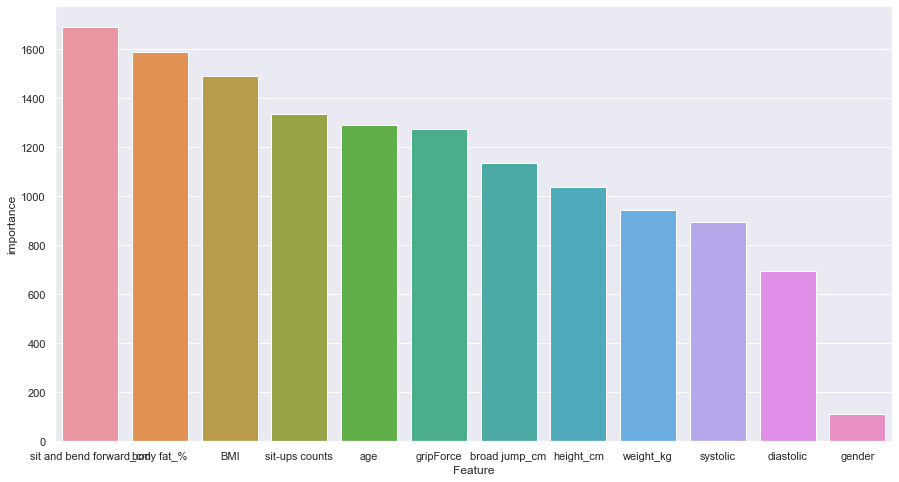

In [490]:
%matplotlib inline
plt.figure(figsize=(15,8))

sns.set(style="darkgrid")
sns.set_color_codes("pastel")
sns.barplot(x="Feature", y="importance", data=df_fi)

plt.show()